# Seaborn 다중 데이터셋 수업자료 (소형 내장 데이터 위주)

목표: Titanic에만 의존하지 않고, **작고 가벼운 Seaborn 내장 데이터셋**으로 다양한 차트를 경험합니다.
- 사용 데이터: `tips`, `penguins`, `flights`, `iris`, `car_crashes`, `exercise`
- 형식: **설명 → 코드 → (실행 결과 확인)**
- 한글 폰트는 Matplotlib만으로 설정하고, Seaborn 테마는 사용하지 않습니다.

## 0. 환경 설정 (폰트만 설정, 테마 사용 안 함)
- 운영체제에 설치된 한국어 폰트를 자동으로 탐색해서 지정합니다.
- `axes.unicode_minus=False`로 마이너스 부호 깨짐 방지.

In [1]:

import warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from seaborn import load_dataset
from matplotlib import font_manager, rcParams
warnings.filterwarnings("ignore")

candidates = ["Malgun Gothic", "AppleGothic", "NanumGothic", "Noto Sans CJK KR"]
avail = {f.name for f in font_manager.fontManager.ttflist}
for name in candidates:
    if name in avail:
        rcParams["font.family"] = name
        break
rcParams["axes.unicode_minus"] = False

print("Font set to:", rcParams["font.family"])
print("Seaborn:", sns.__version__)


Font set to: ['Malgun Gothic']
Seaborn: 0.13.2


## 1. 데이터 로드 헬퍼
- `seaborn.load_dataset(name)`으로 데이터를 로드합니다.
- 각 데이터셋의 샘플과 간단 통계를 확인합니다.

In [2]:

DATASETS = ["tips", "penguins", "flights", "iris", "car_crashes", "exercise"]
data = {name: load_dataset(name) for name in DATASETS}

for k, v in data.items():
    print(f"\n== {k} ==")
    display(v.head(3))
    display(v.select_dtypes(include=[np.number]).describe().T)



== tips ==


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00



== penguins ==


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0



== flights ==


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


,count,mean,std,min,25%,50%,75%,max
year,144.0,1954.500000,3.464102,1949.0,1951.75,1954.5,1957.25,1960.0
passengers,144.0,280.298611,119.966317,104.0,180.00,265.5,360.50,622.0



== iris ==


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5



== car_crashes ==


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ


,count,mean,std,min,25%,50%,75%,max
total,51.0,15.790196,4.122002,5.900,12.7500,15.600,18.500,23.900
speeding,51.0,4.998196,2.017747,1.792,3.7665,4.608,6.439,9.450
alcohol,51.0,4.886784,1.729133,1.593,3.8940,4.554,5.604,10.038
not_distracted,51.0,13.573176,4.508977,1.760,10.4780,13.857,16.140,23.661
no_previous,51.0,14.004882,3.764672,5.900,11.3480,13.775,16.755,21.280
ins_premium,51.0,886.957647,178.296285,641.960,768.4300,858.970,1007.945,1301.520
ins_losses,51.0,134.493137,24.835922,82.750,114.6450,136.050,151.870,194.780



== exercise ==


,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,90.0,44.5,26.124701,0.0,22.25,44.5,66.75,89.0
id,90.0,15.5,8.703932,1.0,8.00,15.5,23.00,30.0
pulse,90.0,99.7,14.858471,80.0,90.25,96.0,103.00,150.0


---
## A. Tips — 분포 & 범주형 비교
식당 팁 데이터. 연속형 분포와 범주 비교를 익힙니다.

In [3]:
tips = data["tips"].copy()
tips["tip_pct"] = tips["tip"] / tips["total_bill"]
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


# histplot — 히스토그램(막대분포도)

* 목적(무엇을 보나): 값이 어느 구간에 많이 몰렸는지, 치우침/꼬리/이상치 감지.

* 언제 쓰나: 연속형/이산형 분포의 첫 관찰.

* 핵심 옵션

  * bins(막대 수), binwidth(구간 너비), binrange(범위)

  * stat: "count"|"probability"|"density" (밀도 비교 시 density)

  * multiple: "layer"|"stack"|"fill" (그룹 비교)

  * kde=True(KDE 라인 같이 표시)

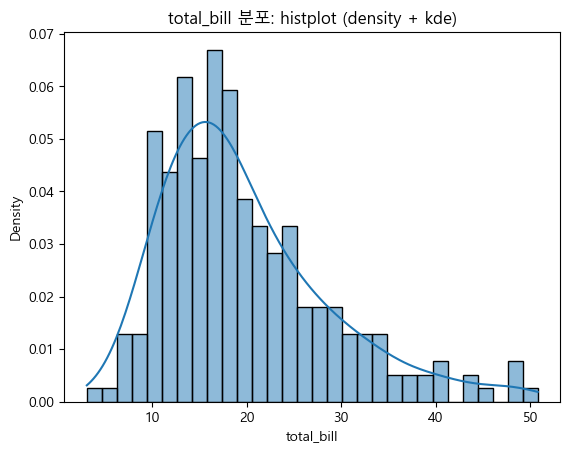

In [4]:
plt.figure()
sns.histplot(tips["total_bill"], bins=30, stat="density", kde=True)
plt.title("total_bill 분포: histplot (density + kde)")
plt.show()

# kdeplot — 커널 밀도 추정(KDE)

* 목적: 히스토그램보다 부드러운 분포 형태 파악 (봉우리/꼬리).

* 언제: 샘플이 충분하고 분포 형태 자체가 관심일 때.

* 핵심 옵션

  * fill=True(면적 채우기), bw_adjust(대역폭; 작으면 세밀, 크면 매끈)

  * common_norm(여러 그룹 비교 시 정규화 방식)

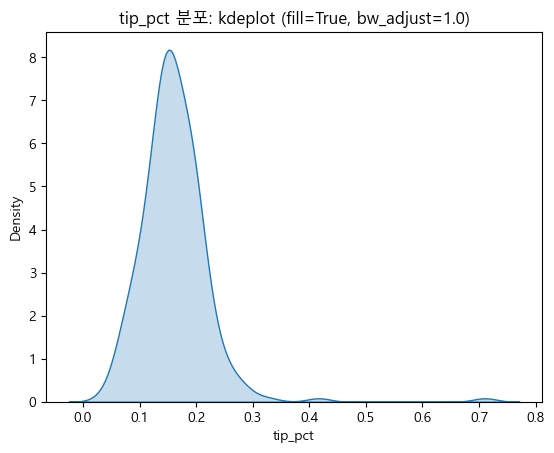

In [5]:
plt.figure()
sns.kdeplot(tips["tip_pct"], fill=True, bw_adjust=1.0)
plt.title("tip_pct 분포: kdeplot (fill=True, bw_adjust=1.0)")
plt.show()

# ecdfplot — 경험적 누적분포 함수(ECDF)

* 목적: “x 이하의 누적 비율”을 바로 읽음(분위수·중위수 판단 용이).

* 언제: “50%가 얼마 이하?”, “상위 10% 컷?”처럼 백분위/분위수가 궁금할 때.

* 핵심 옵션

  * complementary=True(1−ECDF, 역누적)

  * hue(그룹별 누적곡선 비교)

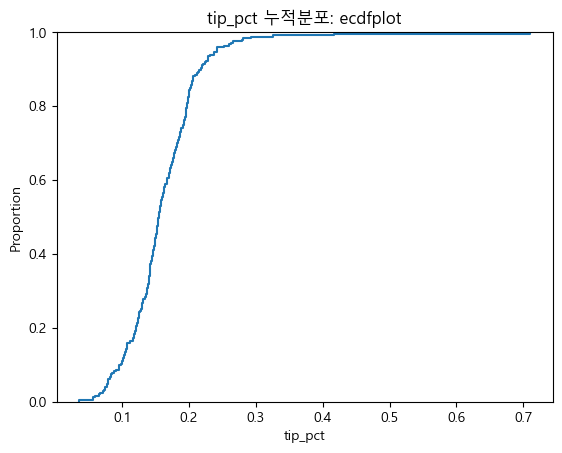

In [6]:
plt.figure()
sns.ecdfplot(tips["tip_pct"])
plt.title("tip_pct 누적분포: ecdfplot")
plt.show()

x=0.2 (20%)일 때 y≈0.8
→ 손님 중 약 80%가 팁 비율 20% 이하
즉, 대부분의 손님은 20% 이하의 팁을 줍니다.

# barplot

* 목적:
  * 범주형 변수(day)별로 연속형 값(tip_pct)의 평균(혹은 다른 통계량) 을 막대로 표현하는 그래프입니다.
즉, “요일별 평균 팁 비율이 얼마나 다른가?” 를 시각적으로 비교하기 위한 요약 통계형 막대그래프입니다.

* 언제:

  * 그룹별 평균값, 중앙값, 합계 등을 비교할 때
  * 단순 빈도(countplot)가 아닌 집계된 값의 차이를 보고 싶을 때
  * 그룹 간 차이의 대략적인 경향을 파악할 때

* errorbar (오차막대)란?
  * 막대 위아래의 가늘고 짧은 선(line)
  * 데이터의 변동성(흩어짐 정도) 을 시각적으로 표현
  * 주로 표준편차(sd) 또는 표준오차(se) 또는 신뢰구간(ci) 으로 표시됨

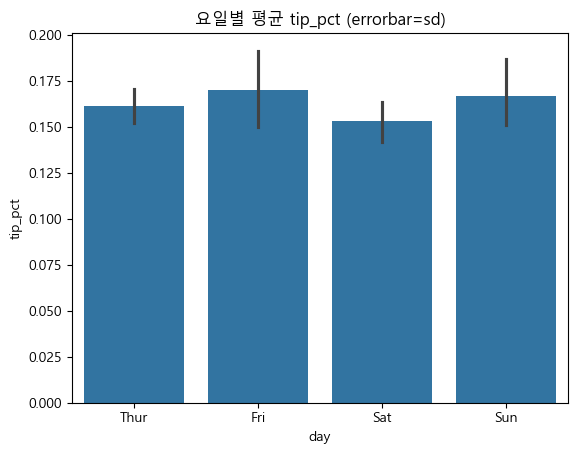

In [7]:
plt.figure()
sns.barplot(data=tips, x="day", y="tip_pct", estimator=np.mean, errorbar=("ci", 95))
plt.title("요일별 평균 tip_pct (errorbar=sd)")
plt.show()

이 그래프는 요일별 평균 팁 비율의 추정값과 그 95% 신뢰구간을 함께 보여줍니다.<br>
금요일이 평균적으로 가장 높은 팁 비율을 보이지만,<br>
다른 요일과의 차이는 신뢰구간이 겹치므로 유의미한 수준으로 단정하긴 어렵습니다.<br>
따라서 “요일에 따른 팁 비율 차이”는 약간의 경향은 있지만 통계적으로 뚜렷하지 않다고 해석할 수 있습니다.

# boxplot

* 목적:
  * 데이터의 중앙값·사분위수·이상치를 한눈에 보여주는 요약 통계 시각화입니다.
  * 분포의 중심, 퍼짐(분산), 비대칭성, 이상값(outlier)을 간결하게 비교할 수 있습니다.
* 언제:
  * 범주별 분포 비교를 할 때 (예: 요일별, 성별, 그룹별)
  * 평균보다 중앙값 중심의 통계가 중요할 때
  * 이상치 탐색이나 데이터 편향 확인이 필요할 때

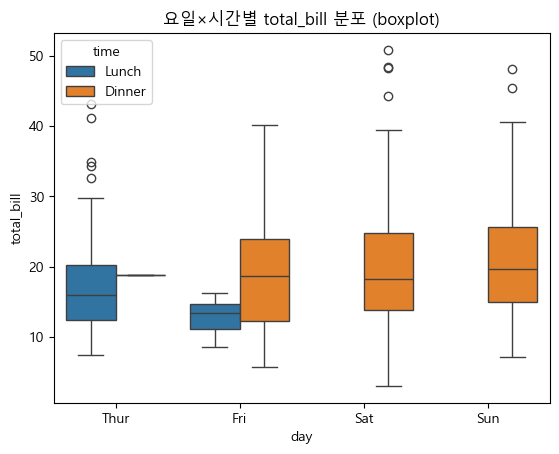

In [8]:
plt.figure()
sns.boxplot(data=tips, x="day", y="total_bill", hue="time")
plt.title("요일×시간별 total_bill 분포 (boxplot)")
plt.show()

# violinplot

* 목적:
데이터의 분포 형태를 시각적으로 표현하면서,
**중앙값(중앙선)**과 사분위 범위를 동시에 보여줍니다.
즉, boxplot(상자그림) + KDE(밀도분포)의 결합형 그래프입니다.
이 코드에서는 요일(day)과 식사시간(time)에 따른
총 지출액(total_bill)의 분포를 한눈에 비교합니다.
언제:

범주별 분포 비교를 하고 싶을 때

단순 평균/오차막대(barplot)보다 분포의 모양을 강조하고 싶을 때

특히 값이 쌍봉형(두 개의 봉우리) 이거나 비대칭적 분포일 때 유용합니다.

split=True를 사용하면 두 그룹(hue)을 한 바이올린 안에서 좌우로 나눠 비교할 수 있습니다.

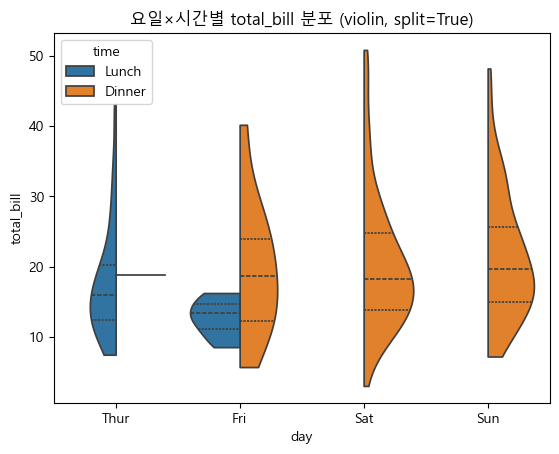

In [9]:
plt.figure()
sns.violinplot(data=tips, x="day", y="total_bill", hue="time", split=True, cut=0, inner="quartile")
plt.title("요일×시간별 total_bill 분포 (violin, split=True)")
plt.show()

# stripplot 
* 범주형 데이터의 분포 확인
* “요일별 팁 비율이 어떻게 퍼져 있나?”
* scatterplot → “팁 비율이 총금액과 어떤 관계가 있나?”

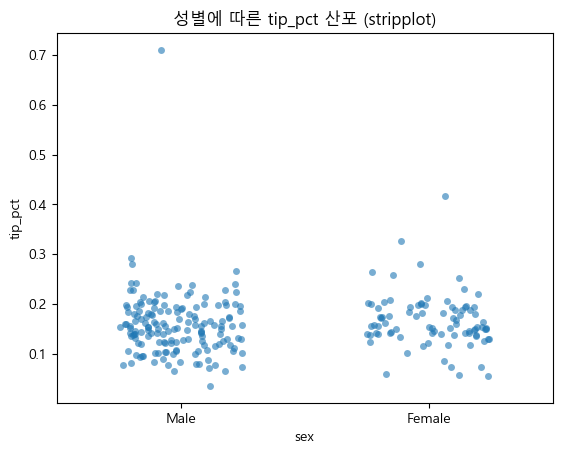

In [10]:
plt.figure()
sns.stripplot(data=tips, x="sex", y="tip_pct", jitter=0.25, alpha=0.6)
plt.title("성별에 따른 tip_pct 산포 (stripplot)")
plt.show()

---
## B. Penguins — 관계 시각화
펭귄 3종의 신체 치수. 산점도, 회귀, 다변량 관계를 익힙니다.

In [11]:
penguins = data["penguins"].dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# scatterplot 

* 목적
  * 두 연속형 변수 간의 관계(상관관계)를 시각화
  * 데이터가 어떤 패턴을 가지는지,
  * 즉 “부리가 길수록 깊이도 깊은가?”, “그룹별 차이는 있는가?” 를 한눈에 파악하기 위해 사용

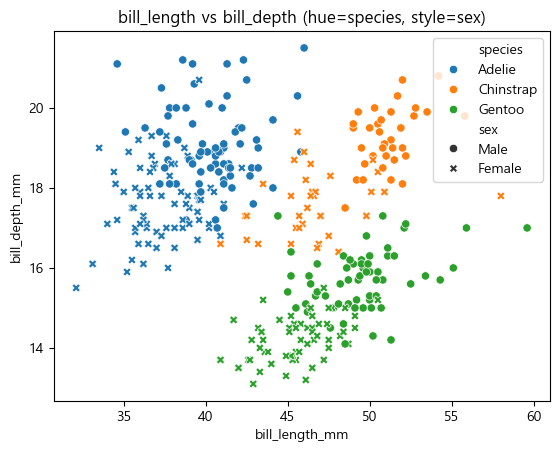

In [12]:
plt.figure()
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",
                hue="species", style="sex")
plt.title("bill_length vs bill_depth (hue=species, style=sex)")
plt.show()

# lmplot
* 목적
  * 두 연속형 변수 간의 선형 관계(상관관계) 를 보여줍니다.
  * 단순한 점(산점도) 대신 회귀선(추세선) 을 추가해,
  * “x가 증가할 때 y가 어떻게 변하는지”를 직관적으로 파악하게 합니다.

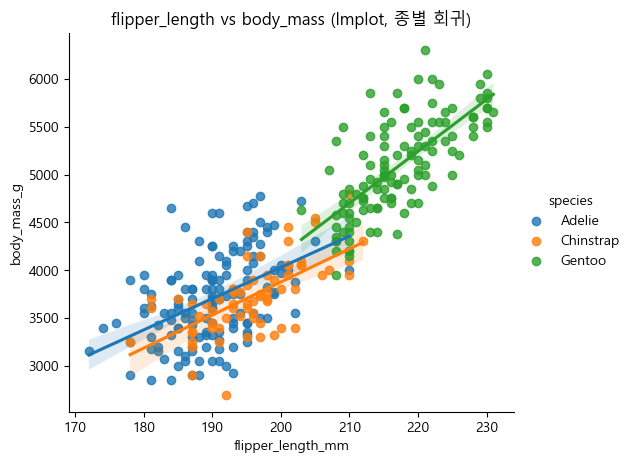

In [13]:
sns.lmplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species",
           height=4.5, aspect=1.2)
plt.title("flipper_length vs body_mass (lmplot, 종별 회귀)")
plt.show()

이 그래프는 펭귄의 지느러미 길이와 체중 간의 관계를 보여줍니다.<br>
세 종 모두 지느러미가 길수록 체중이 증가하는 양의 상관관계를 보이며,<br>
Gentoo가 가장 크고, Adelie가 가장 작습니다.<br>

회귀선 주변의 회색 밴드는 95% 신뢰구간으로,<br>
관계의 불확실성을 나타냅니다.<br>

즉, 체중과 지느러미 길이는 서로 밀접히 관련되어 있으며, 종별로 명확히 구분되는 특성을 가지고 있습니다.

# pairplot
* 목적
  * 여러 연속형 변수들 간의 관계를 한 번에 시각화
  * 산점도(scatterplot) 와 히스토그램(histogram) 이 결합된 형태
  * 변수 간 상관관계 패턴을 빠르게 파악할 수 있음

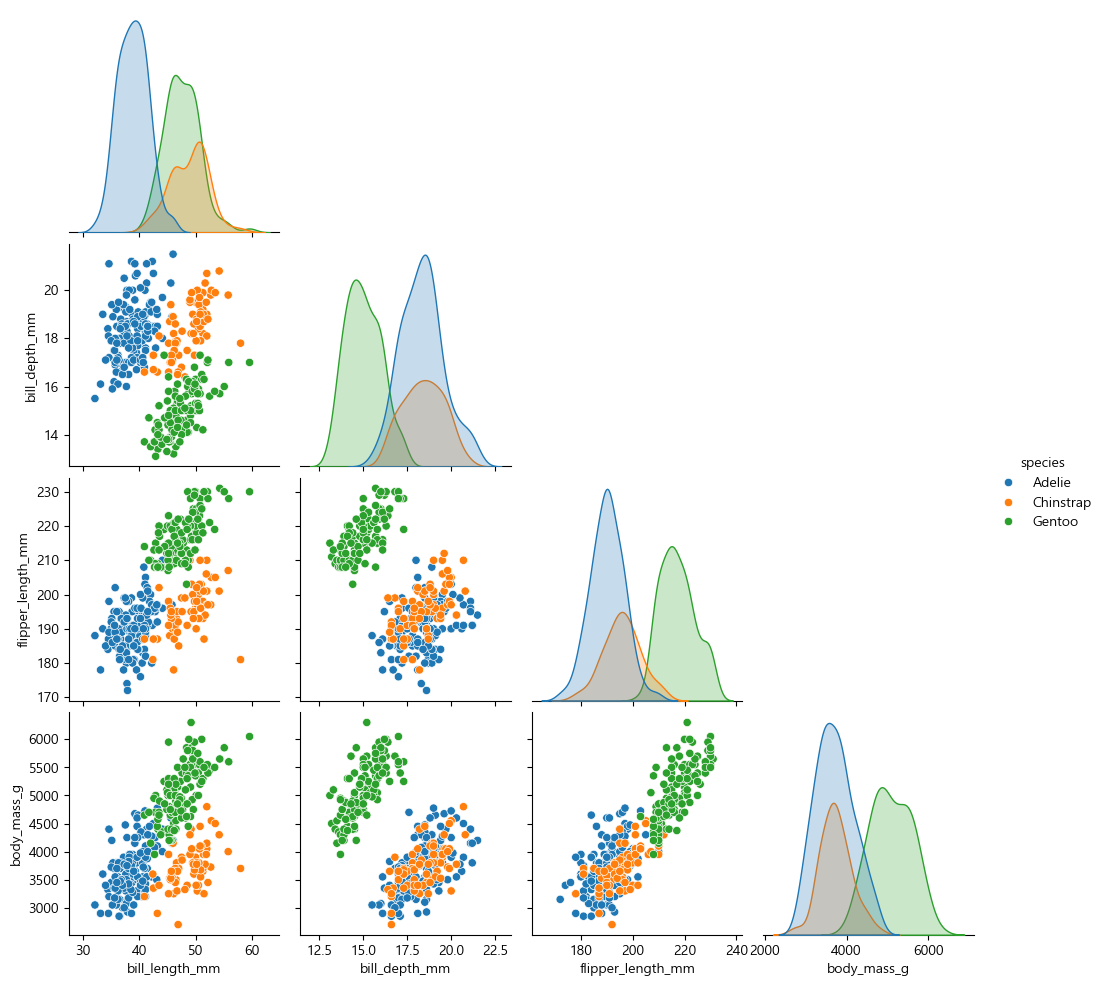

In [14]:
sns.pairplot(penguins[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g","species"]],
             hue="species", corner=True)
plt.show()

---
## C. Flights — 시계열 & 히트맵
연/월별 항공 여객 수. 라인과 피벗 히트맵을 익힙니다.

In [15]:
flights = data["flights"].copy()
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
flights["month_num"] = flights["month"].apply(lambda m: month_order.index(m)+1)
flights["date"] = pd.to_datetime(flights["year"].astype(str) + "-" + flights["month_num"].astype(str) + "-01")
flights = flights.sort_values("date")
flights

,year,month,passengers,month_num,date
0,1949,Jan,112,1,1949-01-01
1,1949,Feb,118,2,1949-02-01
2,1949,Mar,132,3,1949-03-01
3,1949,Apr,129,4,1949-04-01
4,1949,May,121,5,1949-05-01
...,...,...,...,...,...
139,1960,Aug,606,8,1960-08-01
140,1960,Sep,508,9,1960-09-01
141,1960,Oct,461,10,1960-10-01
142,1960,Nov,390,11,1960-11-01


# lineplot 선 그래프, 시계열 추세선

* 시간(time) 에 따른 데이터의 추세(Trend) 를 보여주는 시각화
* 계절성(Seasonality)이나 패턴(증가/감소)을 쉽게 파악할 수 있음
* 데이터가 시간 순서로 정렬되어 있을 때 가장 기본적이고 중요한 형태



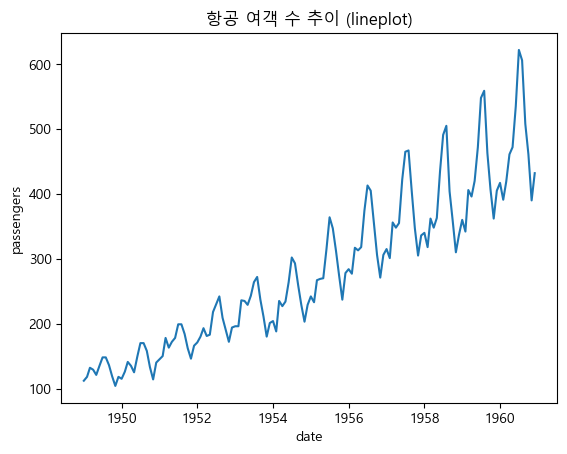

In [16]:
plt.figure()
sns.lineplot(x=flights["date"], y=flights["passengers"])
plt.title("항공 여객 수 추이 (lineplot)")
plt.xlabel("date"); plt.ylabel("passengers")
plt.show()

# heatmap 히트맵(Heatmap) 또는 열지도

* 2차원 데이터(행×열) 를 색의 강도로 표현하는 그래프
* 시간 패턴, 계절성, 클러스터링 등을 직관적으로 파악할 때 사용
* 데이터의 크기나 밀도를 색상 차이로 즉시 인식 가능

 

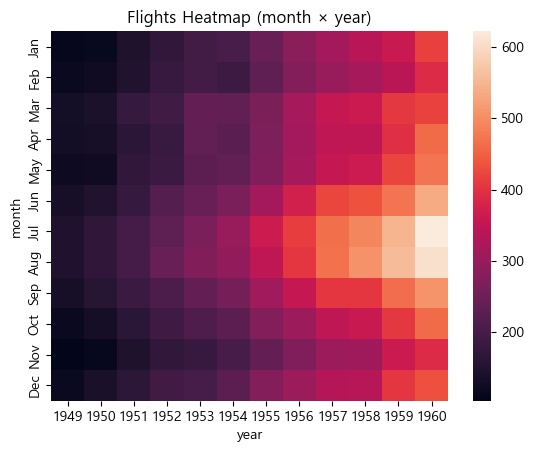

In [17]:
table = flights.pivot(index="month", columns="year", values="passengers")
plt.figure()
sns.heatmap(table, annot=False, fmt="g")
plt.title("Flights Heatmap (month × year)")
plt.show()

---
## D. Iris — 다변량 기본
붓꽃 품종. pairplot과 2D KDE로 분포/경계를 봅니다.

In [18]:
iris = data["iris"].copy()
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


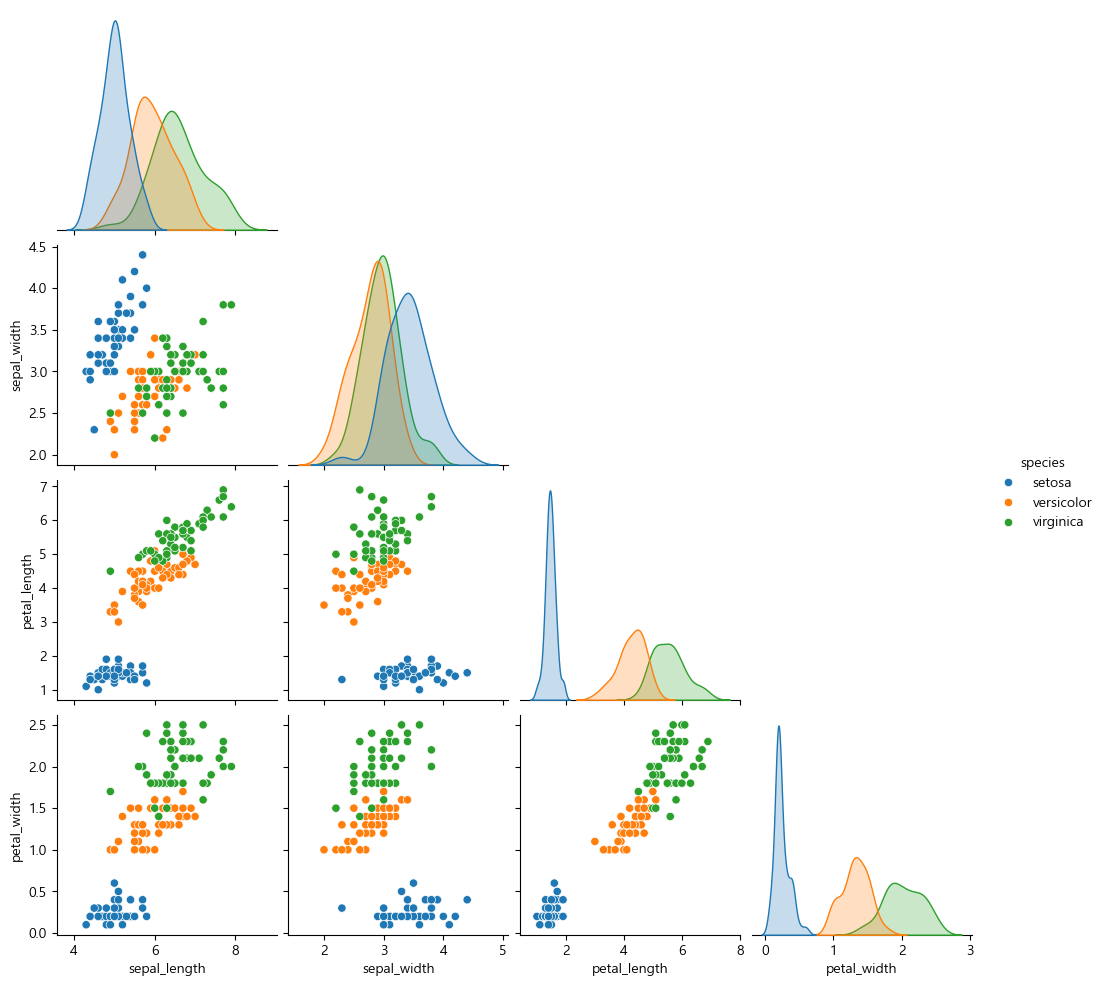

In [19]:
sns.pairplot(iris, hue="species", corner=True)
plt.show()

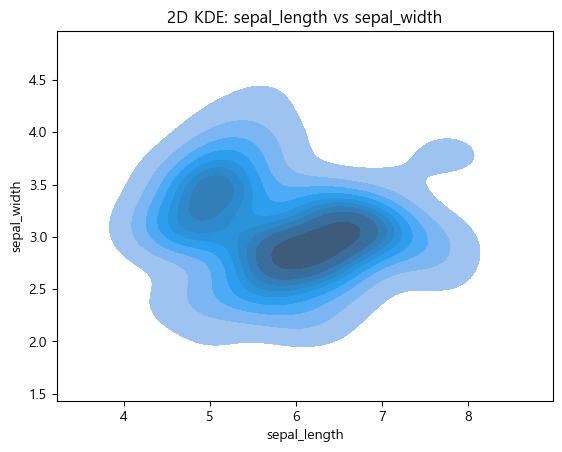

In [20]:
plt.figure()
sns.kdeplot(data=iris, x="sepal_length", y="sepal_width", fill=True, thresh=0.05)
plt.title("2D KDE: sepal_length vs sepal_width")
plt.show()

---
## E. Car Crashes — 상관과 회귀
주별 교통사고 관련 지표. 상관 히트맵과 회귀선을 그려봅니다.

In [21]:
car = data["car_crashes"].copy()
car 

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


In [22]:
cols = ["speeding","alcohol","not_distracted","no_previous","ins_premium","ins_losses"]
corr = car[cols].corr()
corr

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
speeding,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


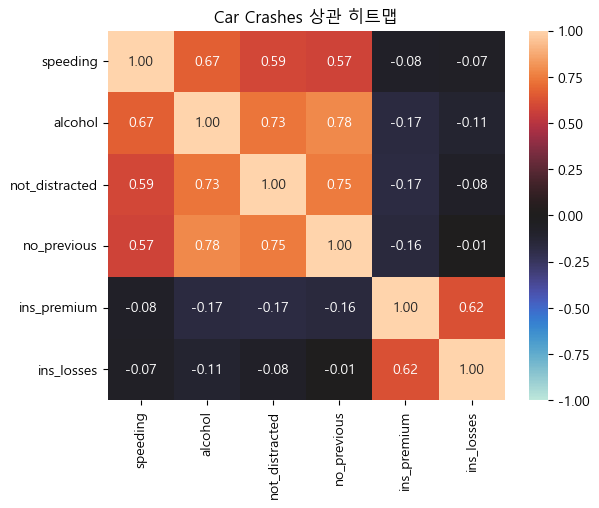

In [23]:
plt.figure()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, center=0, fmt=".2f")
plt.title("Car Crashes 상관 히트맵")
plt.show()

# regplot 회귀선 산점도

* 두 연속형 변수 간의 선형 관계를 시각적으로 확인
* 단순한 scatterplot에 회귀선과 신뢰구간을 추가하여
* “x가 증가하면 y가 함께 증가하는가?”를 직관적으로 파악



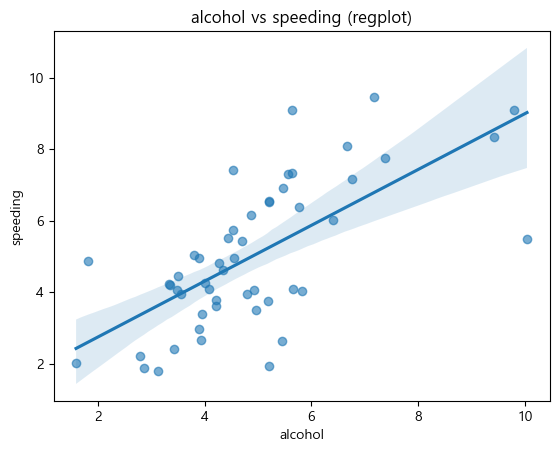

In [24]:
plt.figure()
sns.regplot(data=car, x="alcohol", y="speeding", scatter_kws={'alpha':0.6})
plt.title("alcohol vs speeding (regplot)")
plt.show()

---
## F. Exercise — Facet 실습
식단·운동 종류·시간에 따른 심박수 변화를 패널로 비교합니다.

In [25]:
exercise = data["exercise"].dropna()
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


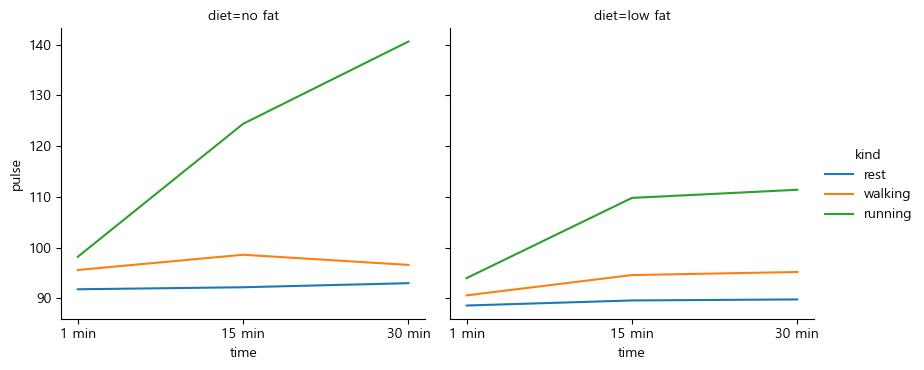

In [26]:
g = sns.relplot(data=exercise, x="time", y="pulse", hue="kind", col="diet",
                kind="line", ci=None, height=3.8, aspect=1.1)
g.set_titles("diet={col_name}")
g.set_axis_labels("time","pulse")
plt.show()

---
## G. 정리 & 확장 아이디어
- 같은 비교를 **다른 그래프 유형**으로 바꿔 그려보기 (`barplot` ↔ `pointplot`, `boxplot` ↔ `violinplot`).
- `errorbar`를 `'sd'`, `('pi', .95)`, `('se', 2)` 등으로 변경해서 신뢰구간/표준오차 감각 익히기.
- `hue_order` / 사용자 정의 팔레트로 **색상 일관성 규칙** 만들기.
- `FacetGrid`를 활용해 **조건별 패널 비교 템플릿** 만들기.
- 시계열은 계절성/추세/이상값 탐지 등의 **해석 포인트**를 슬라이드에 정리해 발표 자료로 전환하기.